In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import numpy as np

lets generated some sample data for the peformance of 4 models A, B, C and D for comparing 

**KEEP IN MIND THE DATA MAKES NO SENSE IN TERMS OF METRICS AND IS ONLY MEANT FOR VISUALISATION PURPOSES**

In [49]:
sample_data = """Model,SSIM,MAE,MSE,PSNR
Model_1,-0.1,2.1,4.7,32.6
Model_2,0.5,0.5,0.45,54.1
Model_3,0.9,0.3,0.12,15.4"""

sample_df = pd.read_csv(io.StringIO(sample_data))
sample_df.set_index("Model", inplace=True)

In [50]:
sample_df

,SSIM,MAE,MSE,PSNR
Model,,,,
Model_1,-0.1,2.1,4.70,32.6
Model_2,0.5,0.5,0.45,54.1
Model_3,0.9,0.3,0.12,15.4


lets normalize all of our data to be between 0 and 1.
- SSIM varies b/w -1 and 1, to normalize we just add 1 and divide by 2.
- MAE can be vary between 0 and infinity, lets assume max valye is 3 for MAE.
- Same case as MAE, max value assumed to be 5
- PSNR for 8-bit grayscale images typically varies b/w 0-60 dB, so here lets just normalize by dividing by 60. 

In [51]:
sample_df["SSIM"] = (sample_df["SSIM"] + 1) / 2
sample_df["MAE"] = sample_df["MAE"] / 3
sample_df["MSE"] = sample_df["MSE"] / 5
sample_df["PSNR"] = sample_df["PSNR"] / 60

sample_df

,SSIM,MAE,MSE,PSNR
Model,,,,
Model_1,0.45,0.700000,0.940,0.543333
Model_2,0.75,0.166667,0.090,0.901667
Model_3,0.95,0.100000,0.024,0.256667


In [52]:
def radar_plot(df, attrs_to_plot, color_list=["r", "g", "b"], title="Radar plot"):
    n_metrics = len(attrs_to_plot)

    angles = list(np.linspace(0, 2 * np.pi, n_metrics, endpoint=False))
    labels = list(attrs_to_plot)

    angles += angles[:1]
    labels += labels[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.set_thetagrids(np.degrees(angles), labels=labels)
    ax.set_ylim(0, 1)

    for color, index_name in zip(color_list, df.index):
        vals = list(df[attrs_to_plot].loc[index_name])
        vals += vals[:1]

        ax.plot(angles, vals, linewidth=1, color=color, label=index_name)
        ax.fill(angles, vals, alpha=0.25, color=color)

    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1), fontsize=11)
    plt.title(title, fontsize=14, pad=10)

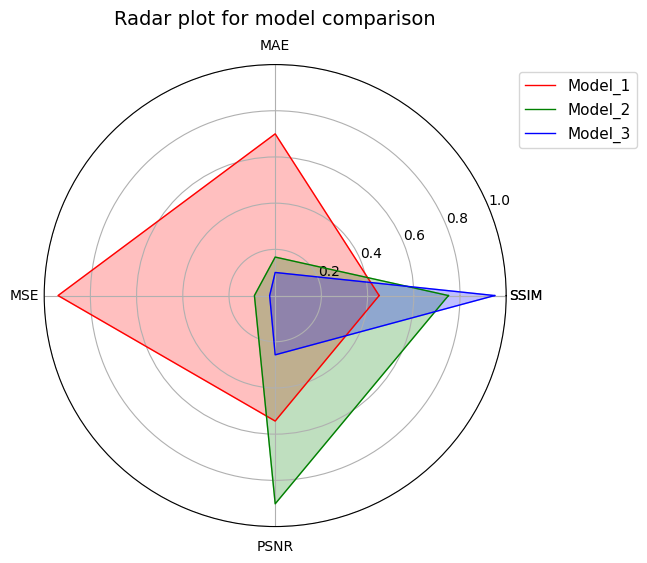

In [53]:
radar_plot(
    sample_df,
    attrs_to_plot=["SSIM", "MAE", "MSE", "PSNR"],
    title="Radar plot for model comparison",
)

One of the issues we see here is that there is a mix of negatively(lower is better) and positively(higher is better) oriented scores. This can create a bit of confusion when looking at the plot. Maybe if we invert them by reversing the MAE and MSE it might make more sense?

Lets try it.

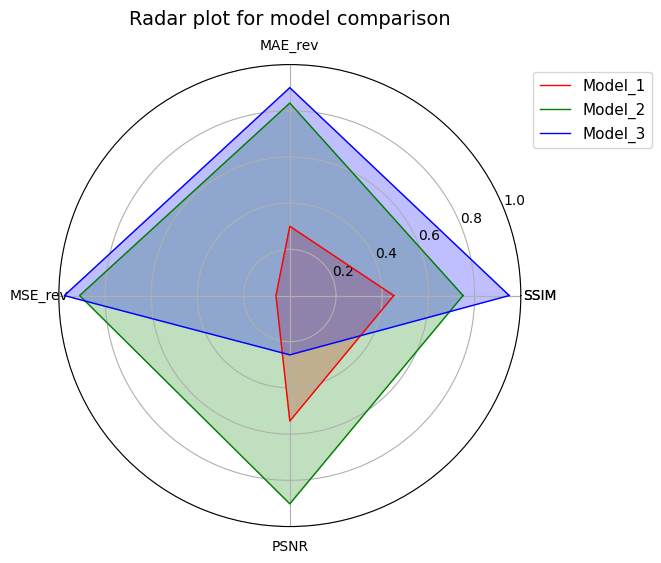

In [54]:
sample_df["MAE_rev"] = 1 - sample_df["MAE"]
sample_df["MSE_rev"] = 1 - sample_df["MSE"]

radar_plot(
    sample_df,
    attrs_to_plot=["SSIM", "MAE_rev", "MSE_rev", "PSNR"],
    title="Radar plot for model comparison",
)

Hmm..., honestly still confusing. I think this can lead to confusion in explaining what **rev_mae** and **rev_mse** is. I think the better approach would be to plot negatively and positively oriented metrics on different plots altogether. 

But regardless, these plots can be used for so much more than just comparing model metrics and can be used for comparing input features or data samples together. Here are some pros and cons of these plots. 

Pros- 
- Gives a nice summary of the different metrics/features for different models/data samples etc. 
- Way better than looking at a table and trying to identify what each model is best at.
- Radar plots are visually very easy to understand and look nice aesthetically.
- Can be adjusted very easily for multiple metrics. 

Cons - 
- More models/samples can result in visual clutter. e.g - plotting the performance of 10 models like this would look horrible.
- All data needs to be normalized before plotting.
- Mixing of positive and negative oriented metrics can lead to confusion. 
- It is very hard to compare to radar plots if the range and variables are different. 